In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [2]:
epochs = read_epochs('nirs_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\grg\nirs_epo.fif ...
    Found the data of interest:
        t =   -4992.00 ...   19968.00 ms
        0 CTF compensation matrices available
Not setting metadata
129 matching events found
No baseline correction applied
0 projection items activated


In [3]:
epochs['rest','left']

Number of events,50
Events,left: 25rest: 25
Time range,-4.992 – 19.968 sec
Baseline,-3.000 – 0.000 sec


In [4]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [5]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,rest,4,-26.735837,5.098874,-183.057840,116.899952,-390.264118,482.745672,-1053.840271,...,34.868459,-107.559506,-39.685110,44.709232,390.034111,-229.505080,-55.436394,-94.557523,-223.495823,167.243852
1,5.120,rest,4,-28.379800,5.308454,38.061968,-118.844975,-374.914234,458.288268,-836.697815,...,14.548968,-85.368629,-62.489758,78.445672,447.317609,-260.497851,-265.922165,13.555442,-184.195669,152.084642
2,5.248,rest,4,-29.379424,4.896491,131.648892,-238.545923,-303.565175,360.973354,-581.620319,...,-8.962791,-54.954638,-76.534532,102.005848,429.095584,-252.721220,-219.006441,-69.333742,-137.219089,137.012146
3,5.376,rest,4,-29.774365,4.082270,54.076922,-189.760482,-192.312873,211.601844,-333.438744,...,-27.819107,-28.217410,-78.613513,109.847693,327.449990,-198.431007,58.957281,-316.944526,-103.889703,139.373122
4,5.504,rest,4,-29.744520,3.212631,-192.269319,36.834477,-62.959174,38.950482,-133.875583,...,-33.226959,-18.268061,-68.834524,100.555415,161.922813,-107.291358,482.749252,-658.544421,-90.669484,161.741700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,11.520,rest,131,-19.682589,-4.950361,53.891275,-141.646015,-370.294671,461.324118,264.959905,...,1.672799,16.456601,-0.214671,8.763824,299.060775,-52.955129,-687.990745,688.938540,-142.707606,150.325170
2796,11.648,rest,131,-18.315912,-6.106341,-24.968533,-106.593841,-456.094480,545.698393,159.363248,...,-20.152898,39.312039,2.914525,2.467644,654.229312,-458.280992,-539.643981,465.731951,-112.825684,202.122610
2797,11.776,rest,131,-17.663675,-6.959055,-54.296572,-101.307349,-485.711731,558.161002,157.546296,...,-34.799818,50.790029,11.133569,-9.910525,939.771824,-807.515928,-359.345344,243.050992,45.611952,104.732302
2798,11.904,rest,131,-17.840608,-7.469400,-30.125713,-121.933728,-439.005293,483.651238,234.675827,...,-43.161159,52.308347,20.610332,-22.845788,1106.454059,-1035.025460,-189.448270,79.534722,317.216065,-138.429532


In [6]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [7]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_18084\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_18084\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_18084\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_18084\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in

In [8]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
4,rest,6.592420,329.101476,198.677218,522.147322,449.614794,7.845365,504.636857,17.989481,69.590673,384.552651,6.377462,18.685435,708.767760,56.468559,383.427362,124.731697,29.844017,413.273494,537.767047,230.097658
5,left,3.445356,329.593971,232.442807,577.650205,351.192706,3.511309,554.391522,18.012186,64.868786,569.177377,5.417431,23.357981,236.087379,52.155258,499.688536,66.542662,27.955376,449.152571,463.129851,306.240171
6,rest,2.869973,295.268109,228.414732,728.864097,385.884232,4.644152,406.008060,20.008855,79.959942,487.337337,2.042018,15.296004,534.358038,42.271260,501.868688,120.967589,38.277672,506.199100,538.333196,254.388683
7,left,2.398348,386.198971,309.940996,522.486552,255.857907,3.253335,479.118238,23.642459,79.034598,562.119204,4.819125,14.991660,382.166201,24.240213,549.748113,104.519418,42.272072,638.872158,448.305855,376.033136
12,rest,11.001783,242.190668,159.634120,483.230110,357.634921,2.700993,416.803304,35.535148,45.939349,321.702556,3.022048,18.797948,398.025437,40.092143,506.327887,74.252716,27.558143,444.666955,419.029066,411.886468
17,left,4.580259,273.172898,308.795965,402.100457,429.291205,2.646178,406.113270,20.874034,58.597756,503.961175,3.181774,11.133395,505.390010,27.565768,515.873738,82.738408,33.012900,595.342401,519.659634,372.840323
18,left,9.808933,279.083520,258.905686,581.726685,391.612598,6.623439,404.334128,20.477693,59.187541,499.664591,14.949100,15.095718,358.959019,47.849322,510.923048,76.134713,23.186208,450.924241,484.507268,386.379035
19,left,1.424312,235.074837,142.243808,344.446498,236.770052,4.641449,502.948479,25.235067,42.538589,371.264792,3.392037,12.010539,355.800447,27.114111,569.596706,102.143785,34.398626,514.939690,376.131191,263.512016
20,rest,4.291638,239.632144,295.419111,362.547812,305.163450,5.516053,475.516235,17.533033,63.147979,504.535096,7.315047,16.095610,627.797322,43.341794,585.700394,58.554598,21.343840,398.234705,418.256160,311.029670


In [9]:
grouped = mean.groupby(['epoch','condition']).count()

In [10]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [11]:
grouped.index.values

array([(4, 'rest'), (5, 'left'), (6, 'rest'), (7, 'left'), (12, 'rest'),
       (17, 'left'), (18, 'left'), (19, 'left'), (20, 'rest'),
       (24, 'rest'), (27, 'rest'), (33, 'left'), (35, 'left'),
       (36, 'rest'), (37, 'left'), (46, 'rest'), (48, 'left'),
       (49, 'rest'), (52, 'left'), (53, 'rest'), (56, 'rest'),
       (58, 'rest'), (60, 'rest'), (62, 'rest'), (63, 'left'),
       (67, 'rest'), (71, 'left'), (73, 'left'), (74, 'left'),
       (75, 'rest'), (77, 'rest'), (85, 'rest'), (88, 'left'),
       (89, 'left'), (91, 'left'), (93, 'left'), (94, 'left'),
       (96, 'left'), (97, 'left'), (107, 'rest'), (113, 'rest'),
       (115, 'left'), (116, 'rest'), (118, 'left'), (124, 'rest'),
       (125, 'left'), (126, 'rest'), (128, 'rest'), (130, 'left'),
       (131, 'rest')], dtype=object)

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [14]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [16]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [19]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

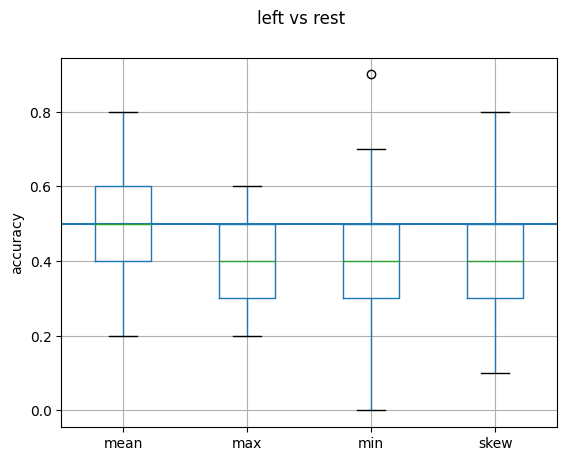

In [20]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [21]:
scores_df.median().to_numpy()

array([0.5, 0.4, 0.4, 0.4])